# Lead Scoring Case Study

In [1]:
# basic libraries to work on the dataframe
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import re

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
# pd.options.display.max_columns = None
# pd.options.display.max_rows = 150
# pd.options.display.float_format = '{:.2f}'.format

https://jovian.com/sanilmanish/lead-scoring-case-study#C0

https://www.kaggle.com/code/ashydv/lead-scoring-logistic-regression

https://github.com/meenujomi/Lead-Scoring-Case-Study

https://www.google.com/search?q=Problem+Background+Company+named+X+Education+gets+a+lot+of+leads.+However%2C+its+lead+conversion+rate+is+very+poor.+For+example%2C+if%2C+say%2C+they+acquire+100+leads+in+a+day%2C+only+about+30+of+them+are+converted.+To+make+this+process+more+efficient%2C+the+company+wishes+to+identify+the+most+potential+leads%2C+also+known+as+%E2%80%98Hot+Leads%E2%80%99.+If+they+successfully+identify+this+set+of+leads%2C+the+lead+conversion+rate+should+go+up+as+the+sales+team+will+now+be+focusing+more+on+communicating+with+the+potential+leads+rather+than+making+calls+to+everyone.+X+Education+has+appointed+you+to+help+them+select+the+most+promising+leads%2C+i.e.+the+leads+that+are+most+likely+to+convert+into+paying+customers.+The+company+requires+you+to+build+a+model+wherein+you+need+to+assign+a+lead+score+to+each+of+the+leads+such+that+the+customers+with+higher+lead+score+have+a+higher+conversion+chance+and+the+customers+with+lower+lead+score+have+a+lower+conversion+chance.&rlz=1C1VDKB_enIN1050IN1050&oq=Problem+Background+Company+named+X+Education+gets+a+lot+of+leads.+However%2C+its+lead+conversion+rate+is+very+poor.+For+example%2C+if%2C+say%2C+they+acquire+100+leads+in+a+day%2C+only+about+30+of+them+are+converted.+To+make+this+process+more+efficient%2C+the+company+wishes+to+identify+the+most+potential+leads%2C+also+known+as+%E2%80%98Hot+Leads%E2%80%99.+If+they+successfully+identify+this+set+of+leads%2C+the+lead+conversion+rate+should+go+up+as+the+sales+team+will+now+be+focusing+more+on+communicating+with+the+potential+leads+rather+than+making+calls+to+everyone.+X+Education+has+appointed+you+to+help+them+select+the+most+promising+leads%2C+i.e.+the+leads+that+are+most+likely+to+convert+into+paying+customers.+The+company+requires+you+to+build+a+model+wherein+you+need+to+assign+a+lead+score+to+each+of+the+leads+such+that+the+customers+with+higher+lead+score+have+a+higher+conversion+chance+and+the+customers+with+lower+lead+score+have+a+lower+conversion+chance.&aqs=chrome..69i57.811j0j1&sourceid=chrome&ie=UTF-8

## Reading and Understanding Data

In [2]:
#Reading the data file using pandas
leadsdf = pd.read_csv('Leads.csv')

leadsdf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# # shape of the dataset
# leadsdf.shape

In [4]:
# leadsdf.info()

In [5]:

# leadsdf.describe()

#### Observations

- Many columns have missing values, which might require handling through imputation or removal.
- Both Prospect ID and Lead Number serve as unique identifiers. Prospect ID can be dropped.
- Column names are verbose; consider renaming for better clarity and usability.
- Several categorical columns contain "Select" entries, which can be treated as null values.
- The dataset contains a mix of numerical and categorical features.
- It appears that the dataset includes features related to lead behavior, source, activities, and interactions.
- The Converted column seems to be the target variable, indicating whether a lead was converted or not.

## Data Cleaning

#### Renaming Columns

In [6]:
# Change column names to snake_case
leadsdf.columns = leadsdf.columns.str.replace(' ', '_').str.lower()

# Test the column name changes
new_column_names = leadsdf.columns
print(new_column_names)

# Shorten specific column names
column_name_mapping = {
    'totalvisits': 'total_visits',
    'total_time_spent_on_website': 'time_on_website',
    'how_did_you_hear_about_x_education': 'source',
    'what_is_your_current_occupation': 'occupation',
    'what_matters_most_to_you_in_choosing_a_course': 'course_selection_reason',
    'receive_more_updates_about_our_courses': 'courses_updates',
    'update_me_on_supply_chain_content': 'supply_chain_content_updates',
    'get_updates_on_dm_content': 'dm_content_updates',
    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
    'a_free_copy_of_mastering_the_interview': 'mastering_interview'
}

leadsdf.rename(columns=column_name_mapping, inplace=True)

# Display the first row with modified column names
leadsdf.head(1)

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')


,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


#### Droping Columns

In [7]:
leadsdf.drop('prospect_id', axis = 1, inplace = True)

#### Replacing 'Select' Category with Null Values

In [8]:
# Find columns that have "Select" entries
select_columns = leadsdf.columns[leadsdf.isin(['Select']).any()].tolist()

# Replace "Select" with NaN in selected columns
leadsdf[select_columns] = leadsdf[select_columns].replace('Select', np.nan)

### null values 

In [9]:
# Calculate and display percentage of null values for each column
for column in leadsdf.columns:
    null_percentage = (leadsdf[column].isnull().sum() / leadsdf.shape[0]) * 100
    print(f"{column}: {null_percentage:.2f}%")

lead_number: 0.00%
lead_origin: 0.00%
lead_source: 0.39%
do_not_email: 0.00%
do_not_call: 0.00%
converted: 0.00%
total_visits: 1.48%
time_on_website: 0.00%
page_views_per_visit: 1.48%
last_activity: 1.11%
country: 26.63%
specialization: 36.58%
source: 78.46%
occupation: 29.11%
course_selection_reason: 29.32%
search: 0.00%
magazine: 0.00%
newspaper_article: 0.00%
x_education_forums: 0.00%
newspaper: 0.00%
digital_advertisement: 0.00%
through_recommendations: 0.00%
courses_updates: 0.00%
tags: 36.29%
lead_quality: 51.59%
supply_chain_content_updates: 0.00%
dm_content_updates: 0.00%
lead_profile: 74.19%
city: 39.71%
asymmetrique_activity_index: 45.65%
asymmetrique_profile_index: 45.65%
asymmetrique_activity_score: 45.65%
asymmetrique_profile_score: 45.65%
cheque_payment: 0.00%
mastering_interview: 0.00%
last_notable_activity: 0.00%


In [10]:
# Columns to drop - that are not needed
columns_to_drop = ['source', 'lead_quality', 'lead_profile', 
                   'asymmetrique_activity_index', 'asymmetrique_profile_index', 
                   'asymmetrique_activity_score', 'asymmetrique_profile_score',
                   'tags', 'last_activity', 'last_notable_activity','country','course_selection_reason']

# Drop the specified columns
leadsdf.drop(columns=columns_to_drop, axis=1, inplace=True)


In [11]:
# Calculate and display percentage of null values for each column
for column in leadsdf.columns:
    null_percentage = (leadsdf[column].isnull().sum() / leadsdf.shape[0]) * 100
    print(f"{column}: {null_percentage:.2f}%")

lead_number: 0.00%
lead_origin: 0.00%
lead_source: 0.39%
do_not_email: 0.00%
do_not_call: 0.00%
converted: 0.00%
total_visits: 1.48%
time_on_website: 0.00%
page_views_per_visit: 1.48%
specialization: 36.58%
occupation: 29.11%
search: 0.00%
magazine: 0.00%
newspaper_article: 0.00%
x_education_forums: 0.00%
newspaper: 0.00%
digital_advertisement: 0.00%
through_recommendations: 0.00%
courses_updates: 0.00%
supply_chain_content_updates: 0.00%
dm_content_updates: 0.00%
city: 39.71%
cheque_payment: 0.00%
mastering_interview: 0.00%


#### `occupation` column

In [12]:
# Create a new category 'Student and Others' for low-representing categories
occupation_mapping = {'Student': 'Student and Others', 'Other': 'Student and Others',
                      'Housewife': 'Student and Others', 'Businessman': 'Student and Others'}

leadsdf['occupation'] = leadsdf['occupation'].replace(occupation_mapping)

# Calculate the percentage of each occupation category after combining
occupation_percentage = (leadsdf['occupation'].value_counts(normalize=True) * 100)
print(occupation_percentage)

# Impute missing values proportionately
proportional_imputation = np.random.choice(['Unemployed', 'Working Professional', 'Student and Others'],
                                           p=[0.8550, 0.1078, 0.0372], size=len(leadsdf))
leadsdf['occupation'].fillna(pd.Series(proportional_imputation), inplace=True)


occupation
Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: proportion, dtype: float64


#### `specialization` column

In [13]:
# Create mapping dictionaries for categorization
specialization_mapping = {
    'Finance Management': 'Management Specializations',
    'Human Resource Management': 'Management Specializations',
    'Marketing Management': 'Management Specializations',
    'Operations Management': 'Management Specializations',
    'IT Projects Management': 'Management Specializations',
    'Supply Chain Management': 'Management Specializations',
    'Healthcare Management': 'Management Specializations',
    'Hospitality Management': 'Management Specializations',
    'Retail Management': 'Management Specializations',
    'Business Administration': 'Business Specializations',
    'International Business': 'Business Specializations',
    'Rural and Agribusiness': 'Business Specializations',
    'E-Business': 'Business Specializations',
    'Banking, Investment And Insurance': 'Industry Specializations',
    'Media and Advertising': 'Industry Specializations',
    'Travel and Tourism': 'Industry Specializations',
    'Services Excellence': 'Industry Specializations',
    'E-COMMERCE': 'Industry Specializations'
}

# Apply mapping for categorization
leadsdf['specialization'] = leadsdf['specialization'].replace(specialization_mapping)

# Calculate the percentage of each specialization category after combining
specialization_percentage = (leadsdf['specialization'].value_counts(normalize=True) * 100)
print(specialization_percentage)

# Impute missing values proportionately
proportional_imputation = np.random.choice(['Management Specializations', 'Business Specializations', 
                                           'Industry Specializations'],
                                           p=[0.7258, 0.1213, 0.1529], size=len(leadsdf))
leadsdf['specialization'].fillna(pd.Series(proportional_imputation), inplace=True)


specialization
Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: proportion, dtype: float64


#### `city` column

In [14]:
# Create mapping dictionaries for city categorization
city_mapping = {
    'Thane & Outskirts': 'Non-Mumbai Maharashtra Cities',
    'Other Cities of Maharashtra': 'Non-Mumbai Maharashtra Cities',
    'Other Cities': 'Non-Maharashtra Cities',
    'Other Metro Cities': 'Non-Maharashtra Cities',
    'Tier II Cities': 'Non-Maharashtra Cities'
}

# Apply mapping for city categorization
leadsdf['city'] = leadsdf['city'].replace(city_mapping)

# Calculate the percentage of each city category after categorization
city_percentage = (leadsdf['city'].value_counts(normalize=True) * 100)
print(city_percentage)

# Impute missing values proportionately
proportional_imputation = np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 'Non-Maharashtra Cities'],
                                           p=[0.5784, 0.2170, 0.2046], size=len(leadsdf))
leadsdf['city'].fillna(pd.Series(proportional_imputation), inplace=True)


city
Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: proportion, dtype: float64


### categorical columns 

In [15]:
# Calculate the percentage of null values for each column
null_percentage = (leadsdf.isnull().sum() / leadsdf.shape[0]) * 100
print(null_percentage)



lead_number                     0.000000
lead_origin                     0.000000
lead_source                     0.389610
do_not_email                    0.000000
do_not_call                     0.000000
converted                       0.000000
total_visits                    1.482684
time_on_website                 0.000000
page_views_per_visit            1.482684
specialization                  0.000000
occupation                      0.000000
search                          0.000000
magazine                        0.000000
newspaper_article               0.000000
x_education_forums              0.000000
newspaper                       0.000000
digital_advertisement           0.000000
through_recommendations         0.000000
courses_updates                 0.000000
supply_chain_content_updates    0.000000
dm_content_updates              0.000000
city                            0.000000
cheque_payment                  0.000000
mastering_interview             0.000000
dtype: float64


In [16]:
# Determine unique values for all object datatype columns
unique_values_dict = leadsdf.select_dtypes(include='object').nunique().to_dict()
for column, unique_count in unique_values_dict.items():
    print(f"{column} = {unique_count}")


lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [17]:

# Categorical columns with more than 2 unique values
categorical_columns = ['lead_origin', 'lead_source']



In [18]:
# Display value counts for 'lead_origin'
print("Value counts for 'lead_origin':")
print(leadsdf['lead_origin'].value_counts(normalize=True, dropna=False) * 100)



Value counts for 'lead_origin':
lead_origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64


In [19]:
# Group smaller values into 'Lead Add Form and Others' for 'lead_origin'
leadsdf['lead_origin'] = leadsdf['lead_origin'].apply(lambda x: 'Lead Add Form and Others' if x in 
                                                      ['Lead Import', 'Quick Add Form', 'Lead Add Form'] else x)



In [20]:
# Display value counts for 'lead_source'
print("Value counts for 'lead_source':")
print(leadsdf['lead_source'].value_counts(normalize=True, dropna=False) * 100)



Value counts for 'lead_source':
lead_source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64


In [21]:
# Impute missing values in 'lead_source' with mode 'Google'
leadsdf['lead_source'].fillna(leadsdf['lead_source'].mode()[0], inplace=True)



In [22]:
# Group smaller values into 'Other Social Sites' for 'lead_source'
leadsdf['lead_source'] = leadsdf['lead_source'].apply(lambda x: x if 
                                                      x in ['Google', 'Direct Traffic', 'Olark Chat', 
                                                           'Organic Search', 'Reference'] 
                                                      else 'Other Social Sites')


### Binary columns


In [23]:

# Determine unique values for object datatype columns
unique_values_dict = leadsdf.select_dtypes(include='object').nunique().to_dict()
for column, unique_count in unique_values_dict.items():
    print(f"{column} = {unique_count}")


lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [24]:

# Observation
print("\n**Observation**")
print("The following columns can be dropped as they have just 1 unique value:")
print("magazine, courses_updates, supply_chain_content_updates, dm_content_updates, cheque_payment")

# List of columns to drop due to 1 unique value
columns_to_drop_unique = ['magazine', 'courses_updates', 
                          'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']




**Observation**
The following columns can be dropped as they have just 1 unique value:
magazine, courses_updates, supply_chain_content_updates, dm_content_updates, cheque_payment


In [25]:
# Drop columns with 1 unique value
leadsdf.drop(columns_to_drop_unique, axis=1, inplace=True)



In [26]:

# Select rest of the binary columns in a new dataframe
binary_columns = ['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
                  'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']



In [27]:
# Display value counts for each of the binary columns
for column in binary_columns:
    value_counts_percentage = (leadsdf[column].value_counts(normalize=True) * 100)
    print(f"Value counts for '{column}':")
    print(value_counts_percentage)
    print()



Value counts for 'do_not_email':
do_not_email
No     92.056277
Yes     7.943723
Name: proportion, dtype: float64

Value counts for 'do_not_call':
do_not_call
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64

Value counts for 'search':
search
No     99.848485
Yes     0.151515
Name: proportion, dtype: float64

Value counts for 'newspaper_article':
newspaper_article
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64

Value counts for 'x_education_forums':
x_education_forums
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64

Value counts for 'newspaper':
newspaper
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64

Value counts for 'digital_advertisement':
digital_advertisement
No     99.95671
Yes     0.04329
Name: proportion, dtype: float64

Value counts for 'through_recommendations':
through_recommendations
No     99.924242
Yes     0.075758
Name: proportion, dtype: float64

Value counts for 'mastering_interview':
masterin

In [28]:
# Observation
print("Because of heavy data imbalance, we can drop the following columns as well:")
print("do_not_call, search, newspaper_article, x_education_forums, newspaper, digital_advertisement, through_recommendations")


Because of heavy data imbalance, we can drop the following columns as well:
do_not_call, search, newspaper_article, x_education_forums, newspaper, digital_advertisement, through_recommendations


In [29]:

# List of binary columns to drop due to heavy data imbalance
columns_to_drop_binary = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
                          'newspaper', 'digital_advertisement', 'through_recommendations']



In [30]:
# Drop columns with heavy data imbalance
leadsdf.drop(columns_to_drop_binary, axis=1, inplace=True)


###  Numerical columns

In [31]:


# Convert 'lead_number' column datatype to object
leadsdf['lead_number'] = leadsdf['lead_number'].astype('object')




In [32]:
# Handle missing values and convert 'total_visits' to integer
median_total_visits = leadsdf['total_visits'].median()
leadsdf['total_visits'].fillna(median_total_visits, inplace=True)
leadsdf['total_visits'] = leadsdf['total_visits'].astype(int)


In [33]:

# Handle missing values in 'page_views_per_visit'
median_page_views_per_visit = leadsdf['page_views_per_visit'].median()
leadsdf['page_views_per_visit'].fillna(median_page_views_per_visit, inplace=True)


In [34]:

# Display updated column datatypes
print(leadsdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB
None


## EDA

### Categorical columns

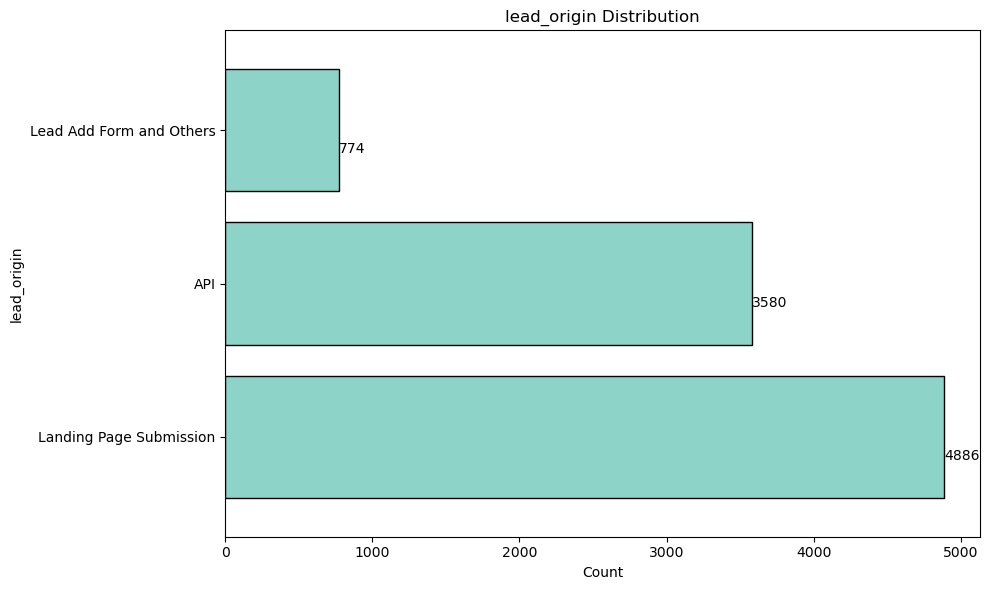

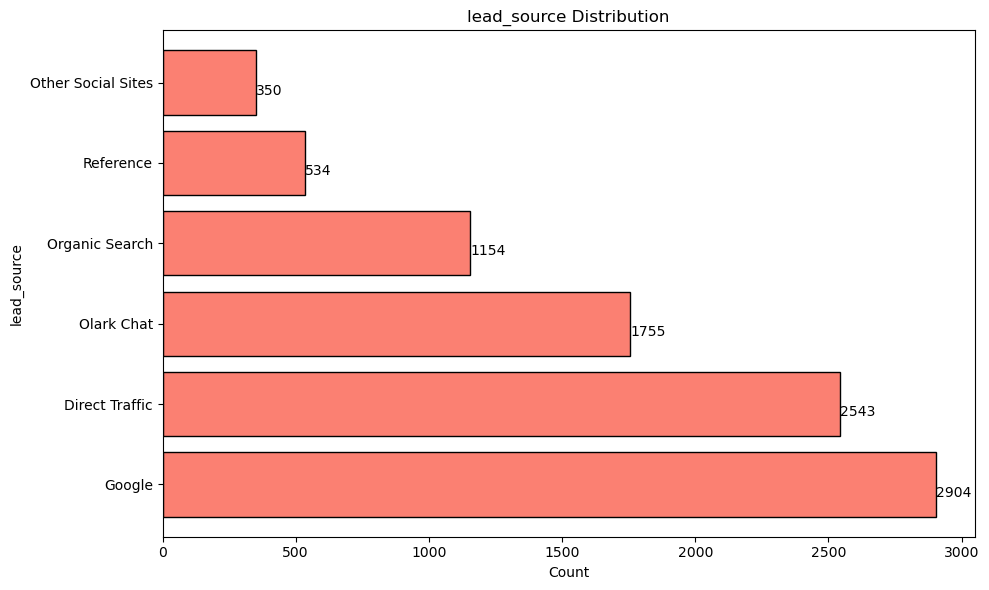

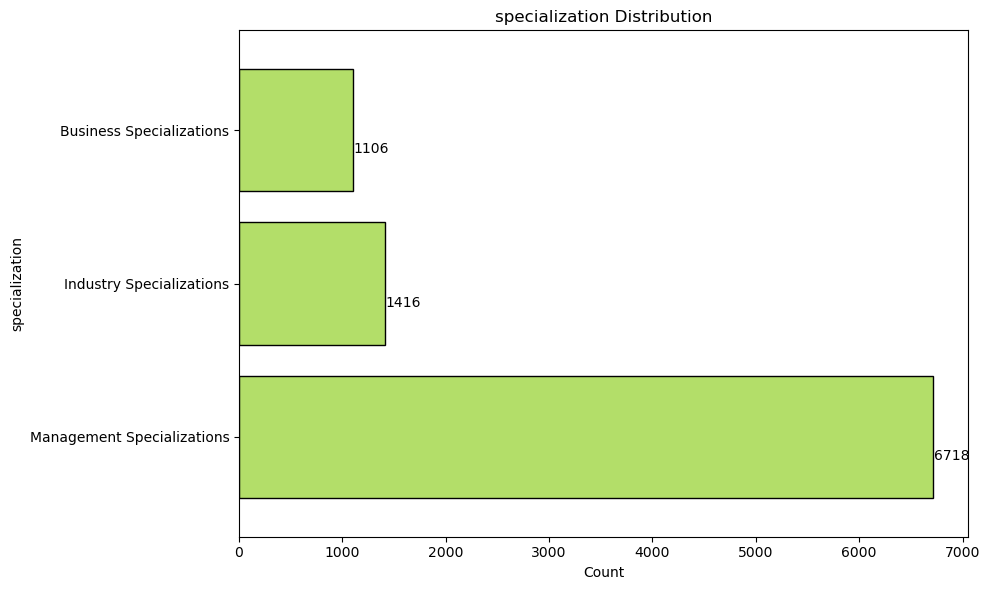

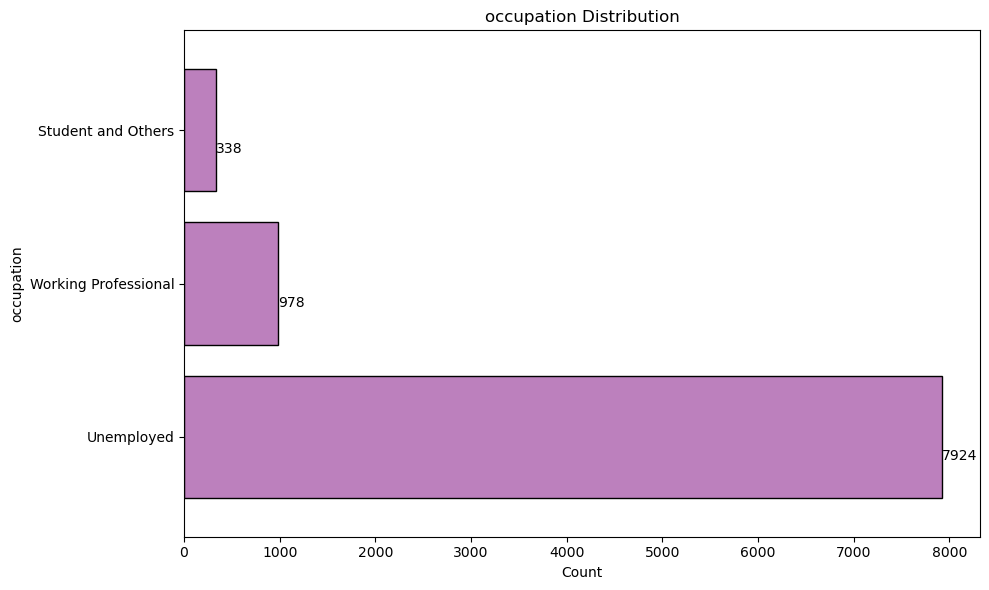

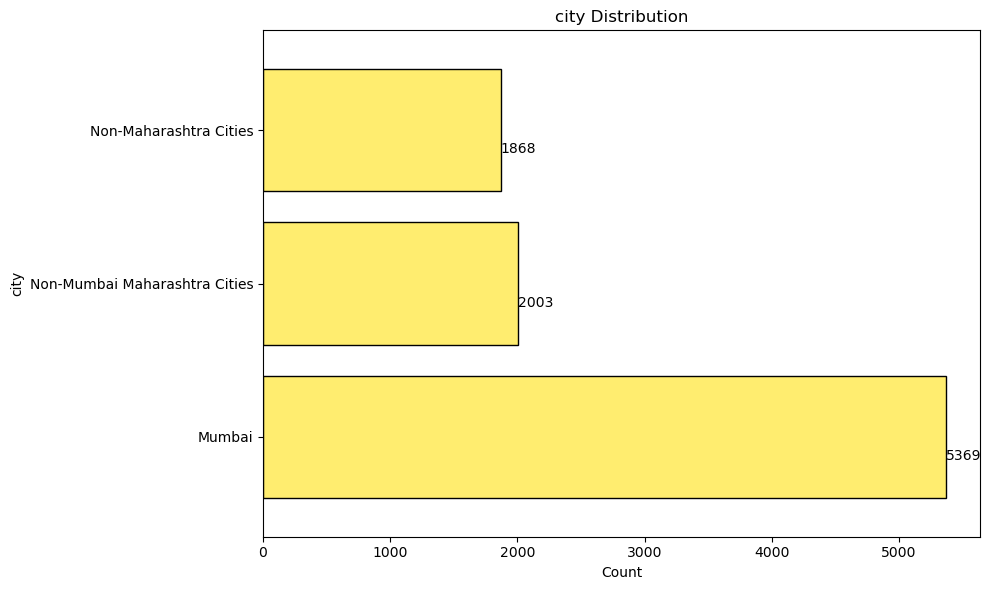

In [35]:
# Categorical columns to visualize
categorical_columns = ['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']

# Define custom color map
custom_colors = plt.cm.get_cmap('Set3', len(categorical_columns))

# Loop through each categorical column for visualization
for idx, column in enumerate(categorical_columns):
    plt.figure(figsize=(10, 6))
    
    # Group and plot the count of lead_number for each category
    leads_count_by_category = leadsdf.groupby(column)['lead_number'].count().sort_values(ascending=False)
    ax = leads_count_by_category.plot(kind='barh', width=0.8, edgecolor='black', color=custom_colors(idx))
    
    # Display the count values on the bars
    for i in ax.patches:
        plt.text(i.get_width() + 0.5, i.get_y() + 0.25, str(int(i.get_width())), fontsize=10, color='black')
    
    # Set plot title, xlabel, and ylabel
    plt.title(f"{column} Distribution")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.tight_layout()
    
    plt.show()

### Numerical columns

### Visualizing Numerical Columns ###


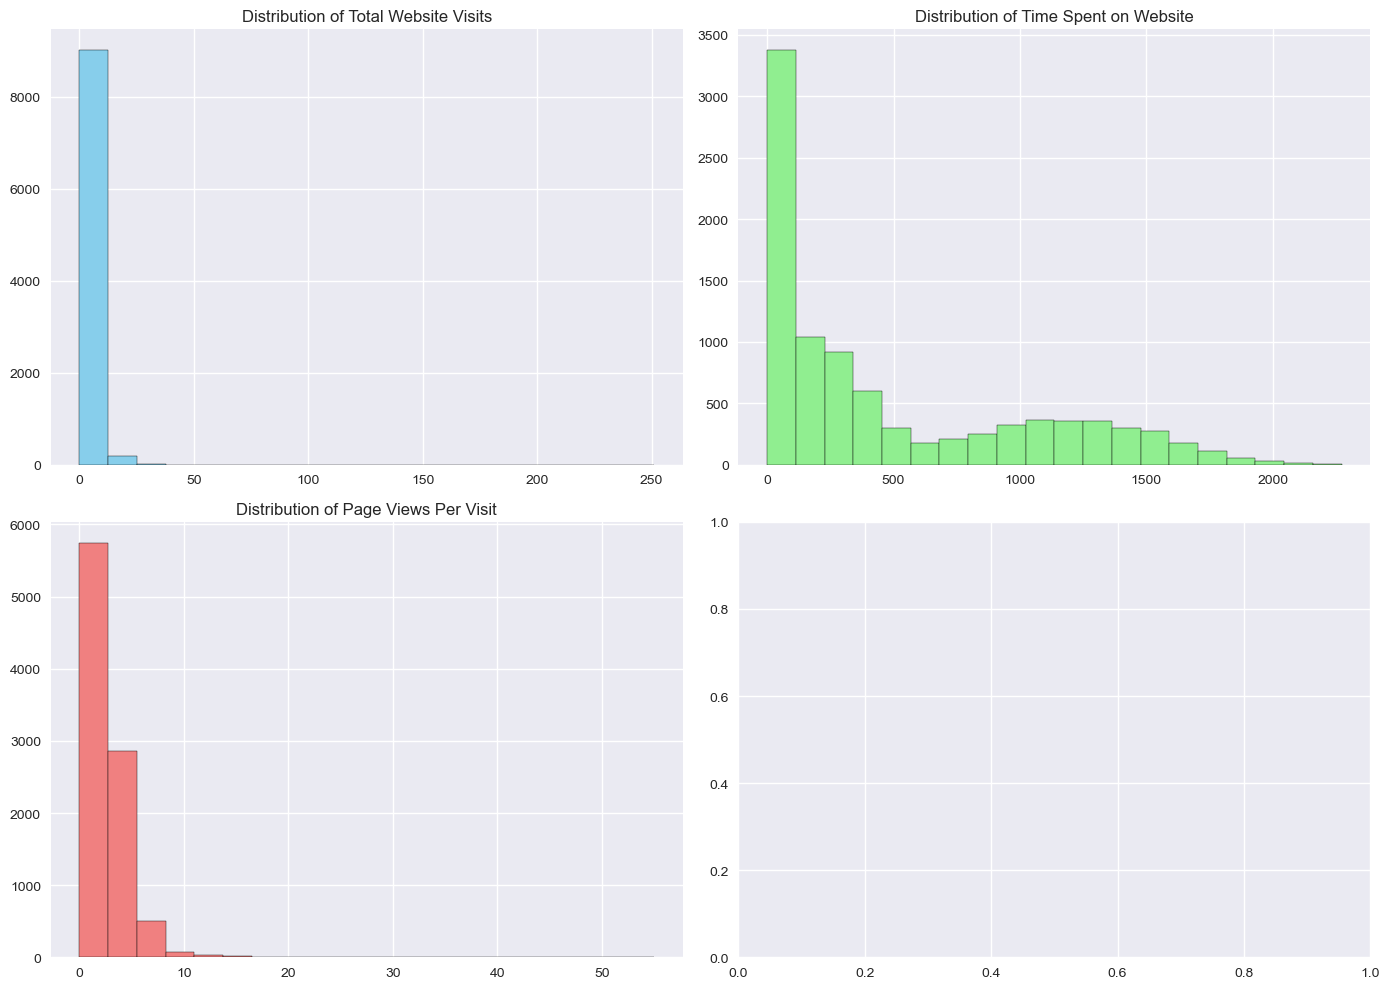

In [36]:
# Heading for your code
print("### Visualizing Numerical Columns ###")

# Set style
plt.style.use('seaborn')

# Distribution plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Total website visits
axs[0, 0].hist(leadsdf['total_visits'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Total Website Visits')

# Time spent on website
axs[0, 1].hist(leadsdf['time_on_website'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Distribution of Time Spent on Website')

# Average number of page views per visit
axs[1, 0].hist(leadsdf['page_views_per_visit'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Distribution of Page Views Per Visit')

# Adjust layout and display plots
plt.tight_layout()
plt.show()



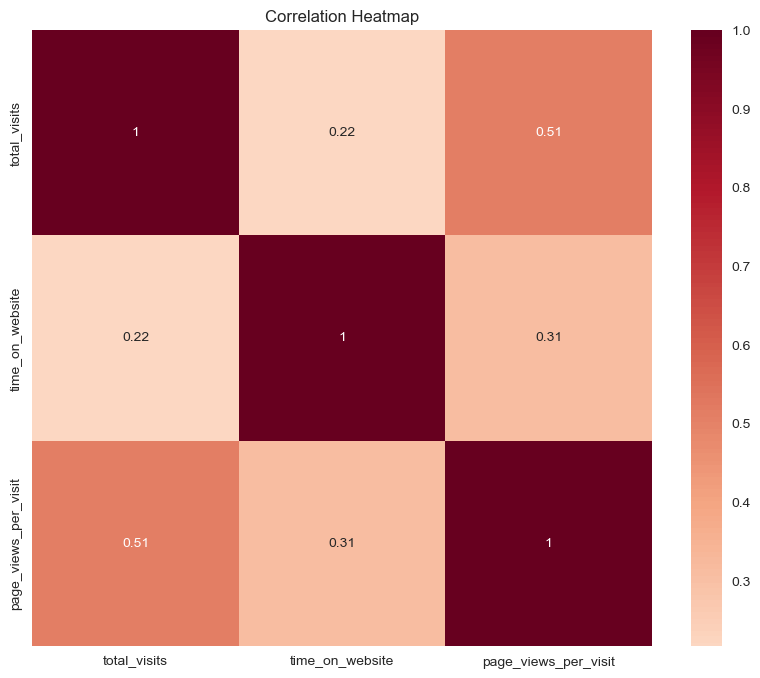

In [37]:
# Correlation heatmap

plt.figure(figsize=(10, 8))
corr_matrix = leadsdf[['total_visits', 'time_on_website', 'page_views_per_visit']].corr()
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, annot=True)
plt.title('Correlation Heatmap')
plt.show()


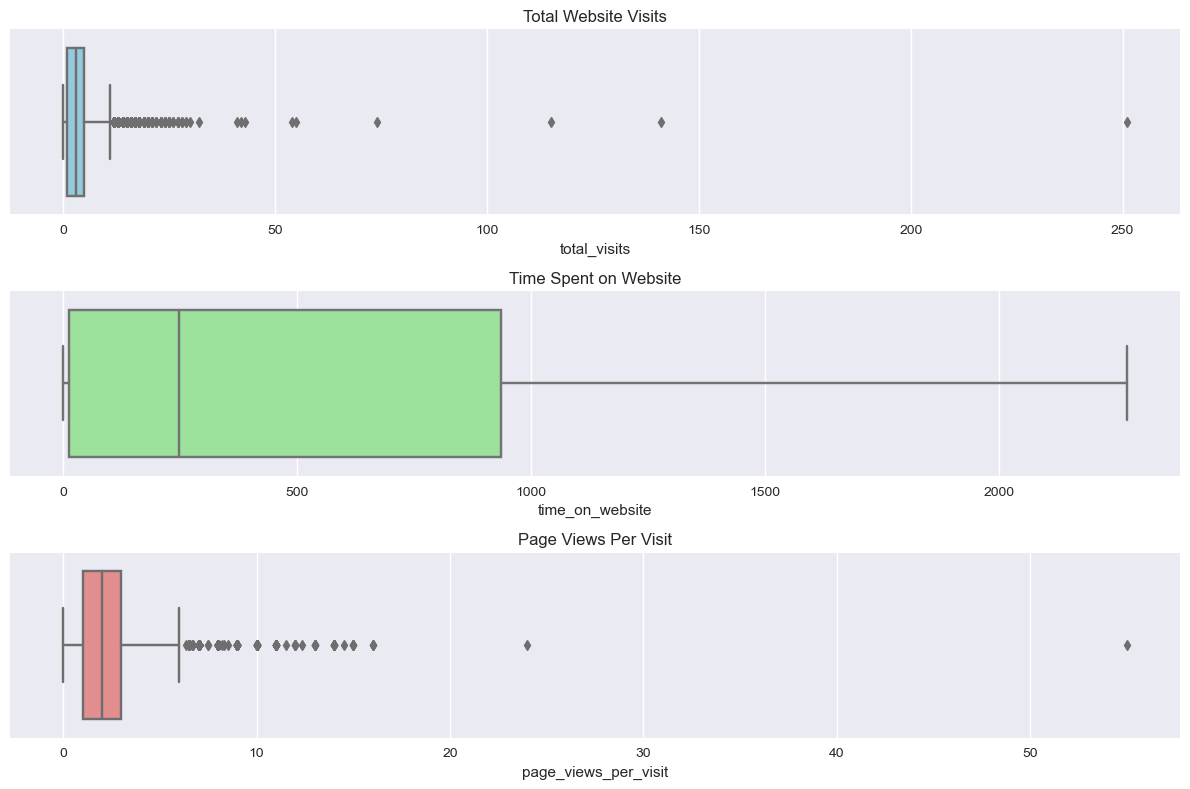

In [38]:
# Box plots for outlier detection
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.boxplot(x=leadsdf['total_visits'], color='skyblue')
plt.title('Total Website Visits')

plt.subplot(3, 1, 2)
sns.boxplot(x=leadsdf['time_on_website'], color='lightgreen')
plt.title('Time Spent on Website')

plt.subplot(3, 1, 3)
sns.boxplot(x=leadsdf['page_views_per_visit'], color='lightcoral')
plt.title('Page Views Per Visit')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## Data Preparation

In [39]:
# List of binary columns to convert
binary_columns = ['do_not_email', 'mastering_interview']

# Map function to convert 'Yes' to 1 and 'No' to 0
binary_map = {'Yes': 1, 'No': 0}
leadsdf[binary_columns] = leadsdf[binary_columns].apply(lambda column: column.map(binary_map))

# Display the first few rows to check the operation
leadsdf.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.0,Industry Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.5,Industry Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Management Specializations,Unemployed,Mumbai,0


In [40]:


# Creating dummy variables and dropping first columns
categorical_columns = ['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']
dummy_df = pd.get_dummies(leadsdf[categorical_columns], drop_first=True)



In [41]:
# Concatenate dummy variables with the main dataframe
leadsdf = pd.concat([leadsdf, dummy_df], axis=1)



In [42]:
# Drop original categorical columns
leadsdf.drop(categorical_columns, axis=1, inplace=True)



In [43]:
# Outliers treatment
num_cols = leadsdf[['total_visits', 'time_on_website', 'page_views_per_visit']]



In [44]:
# Capping outliers at 99th percentile
for col in num_cols.columns:
    leadsdf[col].loc[leadsdf[col] >= leadsdf[col].quantile(0.99)] = leadsdf[col].quantile(0.99)



In [45]:
# Test-Train Split
X = leadsdf.drop(['lead_number', 'converted'], axis=1)
y = leadsdf['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



In [46]:
# Feature Scaling
scaler = StandardScaler()
num_cols = ['total_visits', 'time_on_website', 'page_views_per_visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])



In [47]:
# Checking the conversion rate
conversion_rate = (sum(leadsdf['converted']) / len(leadsdf['converted'].index)) * 100



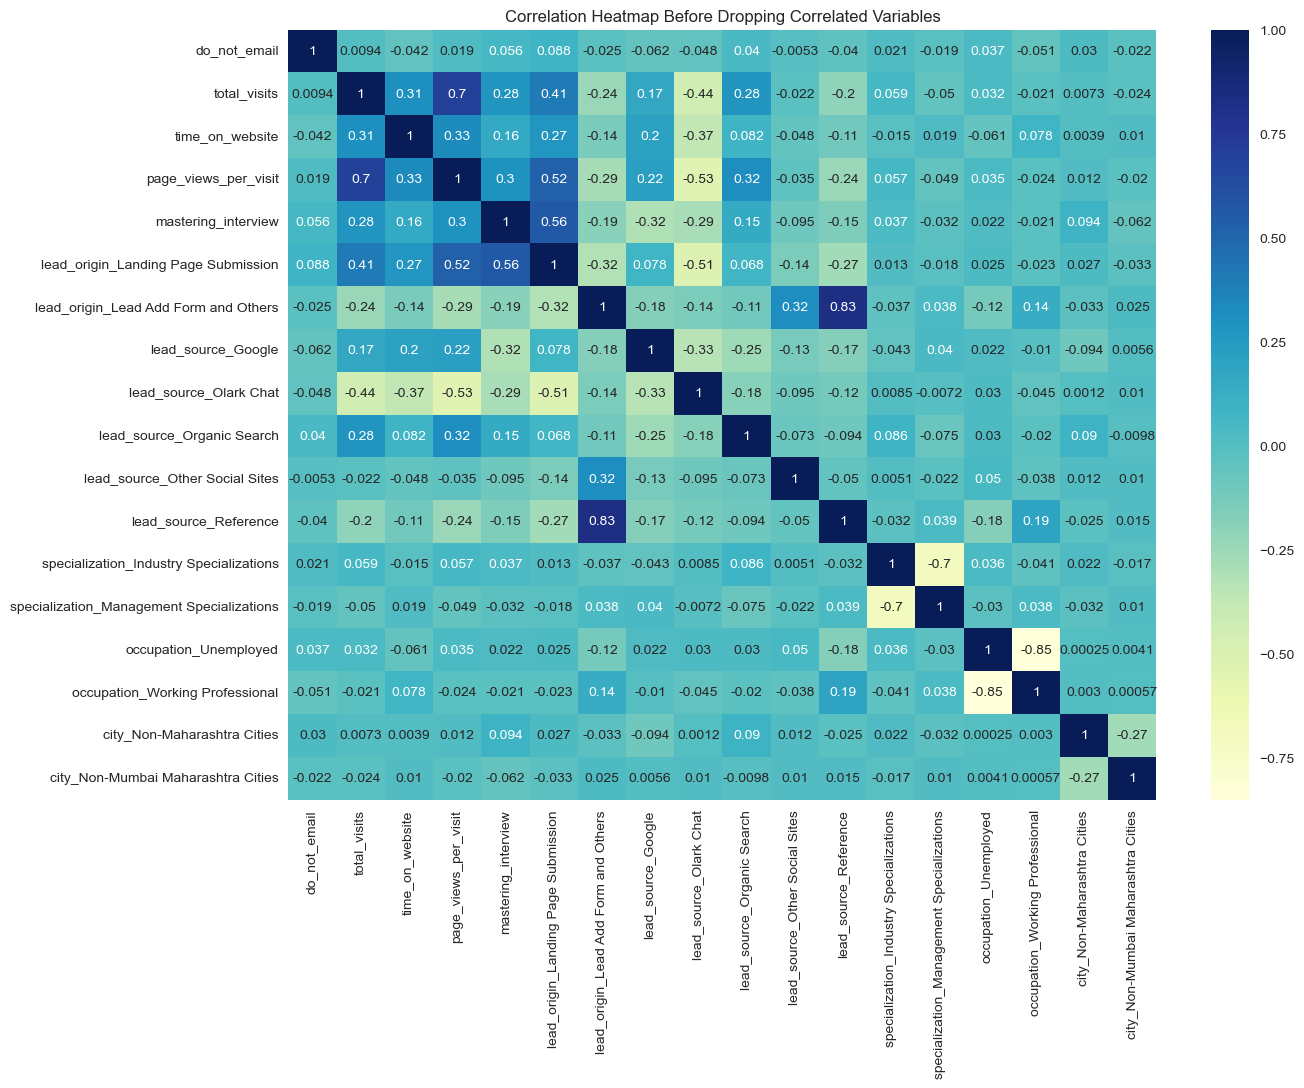

In [48]:
# Correlation Heatmap before dropping correlated variables
plt.figure(figsize=(14, 10))
sns.heatmap(X_train.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap Before Dropping Correlated Variables")
plt.show()



In [49]:
# Drop highly correlated dummy variables
correlated_columns = ['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional']
X_train.drop(correlated_columns, axis=1, inplace=True)
X_test.drop(correlated_columns, axis=1, inplace=True)



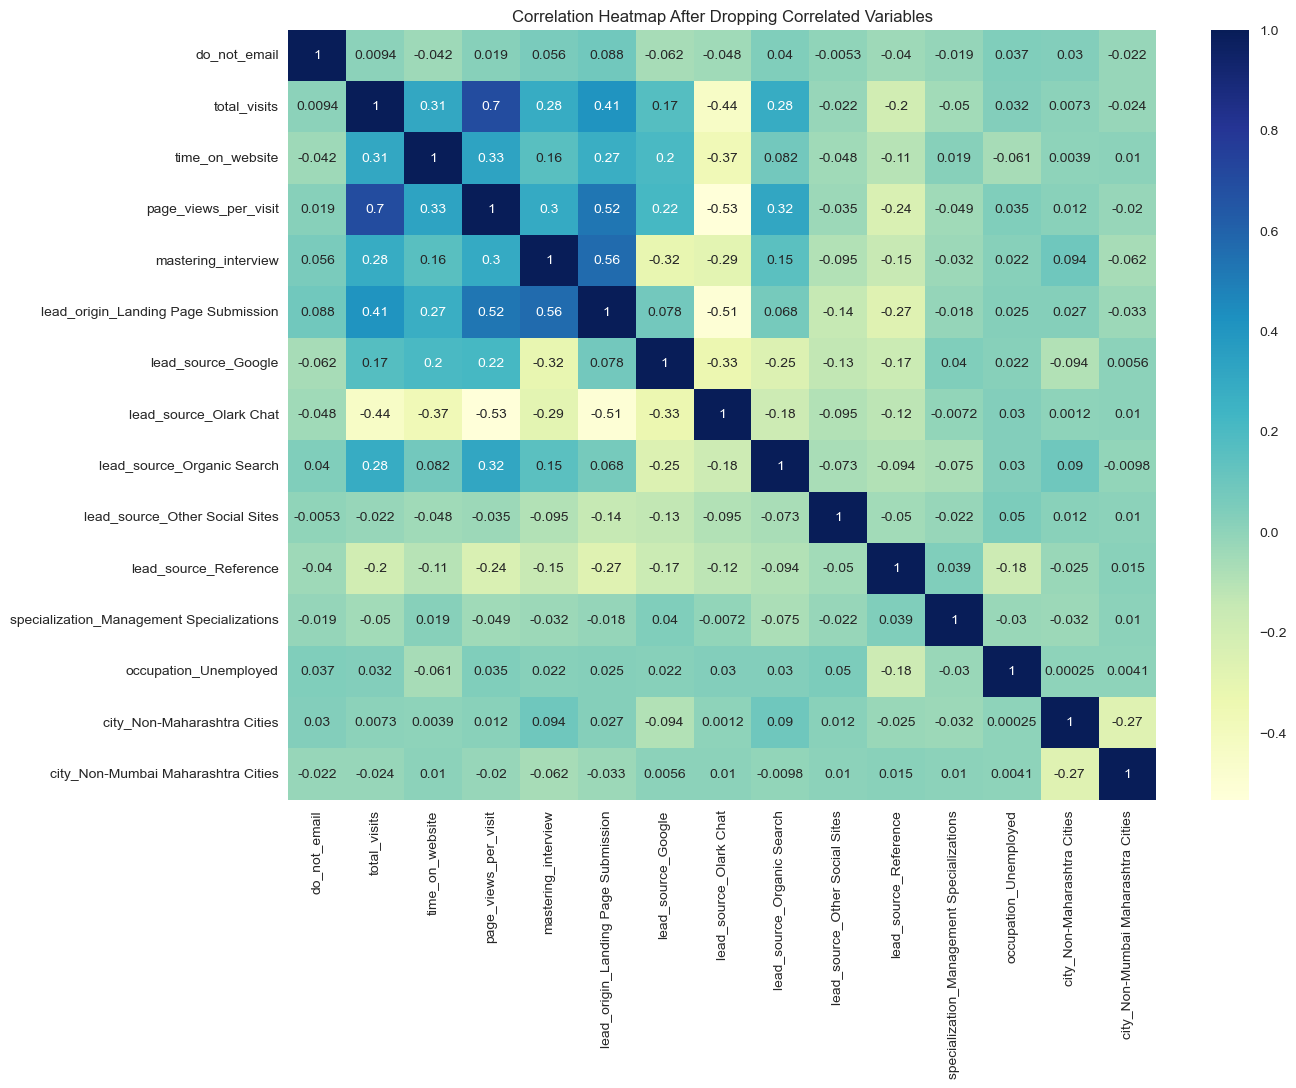

In [50]:
# Correlation Heatmap after dropping correlated variables
plt.figure(figsize=(14, 10))
sns.heatmap(X_train.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap After Dropping Correlated Variables")
plt.show()


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Display model summary
print("Logistic Regression Model Summary:")
print("Coefficients:", logreg_model.coef_)
print("Intercept:", logreg_model.intercept_)

Accuracy: 46.61%
Confusion Matrix:
 [[ 315 1362]
 [ 118  977]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.19      0.30      1677
           1       0.42      0.89      0.57      1095

    accuracy                           0.47      2772
   macro avg       0.57      0.54      0.43      2772
weighted avg       0.61      0.47      0.41      2772

Logistic Regression Model Summary:
Coefficients: [[-1.18158205  0.14456666  1.03384182 -0.1874908  -0.01556744 -0.03053824
   0.32250283  0.61067689  0.20719886  1.57194885  3.74874149  0.02463647
  -1.04623922  0.03981107  0.04897705]]
Intercept: [-0.10409332]
